# СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ СЕРВИСА АРЕНДЫ САМОКАТОВ GOFAST

<a id="0"></a>Поставлена задача от сервиса аренды самокатов GoFast проанализировать данные о разных пользователях из нескольких городов, а также об их поездках, и проверить некоторые гипотезы, способствующие росту бизнеса.

## ИСХОДНЫЕ ДАННЫЕ<br>
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:<br>
- без подписки<br>
          - абонентская плата отсутствует;
          - стоимость одной минуты поездки — 8 рублей;
          - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra<br>
          - абонентская плата — 199 рублей в месяц;
          - стоимость одной минуты поездки — 6 рублей;
          - стоимость старта — бесплатно.

Сведения из полученных данных с информацией о пользователях, их поездках и подписках:

1. Пользователи — _users_go.csv_<br>
      - __user_id__ - уникальный идентификатор пользователя<br>
      - __name__ - имя пользователя<br>
      - __age__ - возраст<br>
      - __city__ - город<br>
      - __subscription_type__ - тип подписки (free, ultra)<br>
<br>
2. Поездки — _rides_go.csv_<br>
      - __user_id__ - уникальный идентификатор пользователя<br>
      - __distance__ - расстояние, которое пользователь проехал в текущей сессии (в метрах)<br>
      - __duration__ - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»<br>
      - __date__ - дата совершения поездки<br>
<br>
3. Подписки — _subscriptions_go.csv_<br>
      - __subscription_type__ - тип подписки<br>
      - __minute_price__ - стоимость одной минуты поездки по данной подписке<br>
      - __start_ride_price__ - стоимость начала поездки<br>
      - __subscription_fee__ - стоимость ежемесячного платежа<br>

## СОДЕРЖАНИЕ<br>
[Шаг 1. Импорт библиотек и загрузка данных](#1)<br>
- [a)	Считываем CSV-файлы с данными в датафреймы и настраиваем библиотеки](#1_1)<br>
- [b)	Изучение каждого набора данных](#1_2)<br>
    - [Изучение датафрейма _users_go_](#1_1_1)<br>
    - [Изучение таблицы _rides_go_](#1_1_2)<br>
    - [Смотрим датафрейм _subscriptions_go_](#1__1_3)<br>
    
[Выводы по шагу 1](#1_3)<br>

[Шаг 2. Предобработка данных](#2)<br>
- [a) Изменение типов данных в столбцах](#2_1)<br>
- [b) Создаём новый столбец с номером месяца на основе столбца date](#2_2)<br>
- [c) Обрабокта неявных дубликатов и пропусков](#2_3)<br>
- [d) Проверка результатов предобработки данных](#2_4)<br>

[Выводы по шагу 2](#2_5)<br>

[Шаг 3. Исследовательский анализ данных](#3)<br>
- [a) частота встречаемости городов](#3_1)<br>
- [b) соотношение пользователей с подпиской и без подписки](#3_2)<br>
- [c) возраст пользователей](#3_3)<br>
- [d) расстояние, которое пользователь преодолел за одну поездку](#3_4)<br>
- [e) продолжительность поездок](#3_5)<br>

[Выводы по шагу 3](#3_6)<br>

[Шаг 4. Объединение данных](#4)<br>
- [a) Сводим данные о пользователях, поездках и подписках в один датафрейм](#4_1)<br>
- [b) Создаём ещё два датафрейма из созданного на предыдущем этапе:](#4_2)<br>
    - [c данными о пользователях с подпиской](#4_2_1)<br>
    - [с данными о пользователях без подписки](#4_2_2)<br>
- [c) Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий](#4_3)<br>

[Выводы по шагу 4](#4_4)<br>

[Шаг 5. Подсчёт выручки](#5)<br>
- [a) Создаём датафрейм с агрегированными данными о поездках на основе объединённого](#5_1)<br>
- [b) Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь](#5_2)<br>

[Выводы по шагу 5](#5_3)<br>

[Шаг 6. Проверка гипотез](#6)<br>
- [a) Тратят ли пользователи с подпиской больше времени на поездки и «выгоднее» ли они для компании](#6_1)<br>
- [b) Проверяем среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, и не превышает ли оно 3130 метров](#6_2)<br>
- [c) Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки](#6_3)<br>
- [d) Проверяем количество обращений в техподдержку после обновления серверов, с которыми взаимодействует мобильное приложение](#6_4)<br>

[Выводы по шагу 6](#6_5)<br>

[Шаг 7 (необязательное задание). Распределения](#7)<br>
- [a) Выясняем, какое минимальное количество промокодов нужно разослать в ходе акции, чтобы вероятность не выполнить план была примерно 5 %](#7_1)<br>
[b) Строим график распределения и оценим вероятность того, что Push-уведомление откроют не более 399,5 тыс. пользователей](#7_2)<br>

[Выводы по шагу 7](#7_3)<br>

[Общий вывод ](#8)<br>

<a id="1"></a>
## Шаг 1. ИМПОРТ БИБЛИОТЕК, ЗАГРУЗКА И ИЗУЧЕНИЕ ДАННЫХ

<a id="1_1"></a>
### a) Считываем CSV-файлы с данными в датафреймы и импортируем библиотеки
[Описание данных](#0_0)<br>
[Содержание](#0_1)

In [1]:
import pandas as pd # таблицы
import numpy as np # математика
from math import factorial # факториалы
from scipy import stats as st # статистика
import copy # копирование значений в новый объкект через deepcopy, а не ссылок на старый объект
import seaborn as sns # визуализация в графиках
import matplotlib # визуализация, настройки дальше
#%matplotlib inline # для отображения графиков сразу под ячейкой кода
from matplotlib import pyplot as plt # для автоматического создания  в графиках осей и других компонентов
from matplotlib import rcParams, rcParamsDefault # установим параметры графиков
# нормальное отображение графиков plt
rcParams['figure.figsize'] = 11, 7 # размер графиков с соотношением сторон почти 4:3
rcParams['figure.dpi'] = 200 # возьмём 200 точек для разрешения по умолчанию, так по-чётче
rcParams['font.style'] = 'normal' # нормальный шрифт
rcParams['font.size'] = 12 # шрифт 12 кегля
rcParams['axes.titlesize'] = 16 # Размер название графика
rcParams['axes.titleweight'] = 'bold' # Выделим название
%config InlineBackend.figure_format = 'svg' # можно и в png, но в svg более чёткое изображенние и масштабируется на разных экранах
# сделаем графики красивыми
#factor = .8 # для установки разрешение изображения на 80% от разрешения экрана
#default_dpi = rcParamsDefault['figure.dpi'] # возьмём параметры разрешения по умолчанию
#rcParams['figure.dpi'] = default_dpi * factor # создадим новые для всех графиков

In [2]:
# Загрузка данных
try:
    users_go = pd.read_csv('/datasets/users_go.csv') 
    rides_go = pd.read_csv('/datasets/rides_go.csv') 
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv') 
except:
    users_go = pd.read_csv('datasets/users_go.csv') 
    rides_go = pd.read_csv('datasets/rides_go.csv') 
    subscriptions_go = pd.read_csv('datasets/subscriptions_go.csv')

In [3]:
# Открываем все колонки
pd.set_option('display.max_columns', None)

<a id="1_2"></a>
### b) Изучение наборов данных

<a id="1_2_1"></a>
#### Изучение датафрейма __*users_go*__

[Описание данных](#0_0)<br>
[Содержание](#0_1)

In [4]:
# Смотрим описание датафрейма и сколько он памяти занимает
users_go.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 412.6 KB


In [5]:
# Посмотрим статистику
users_go.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [6]:
# Смотрим первые 10 строк
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Видно, что таблица __users_go__ состоит из 5 столбцов и 1565 строк, пропусков  не наблюдается, выбросов тоже. Названия столбцов соответствуют общепринятому стилю. Датафрейм занимает в памяти 412.6 Кб, потому что типы данных в столбцах _user_id_, _age_ и _subscription_type_ не оптимальны - их нужно изменить. Изучим далее наличие дублей (колонка _name_ нас __не интересует__).

Дальше глянем, что из себя предстваляют данные о типе подписки.

In [7]:
# Уникальные типы
print('Уникальных значений -', len(users_go['subscription_type'].unique()), 'в', users_go['subscription_type'].count(), 'строках')
print(users_go['subscription_type'].unique())

Уникальных значений - 2 в 1565 строках
['ultra' 'free']


Пропусков в столбце __subscription_type__ нет, а значения позволяют изменить строковый тип данных на логический (bool): _ultra_ на _True_, а _free_ на _False_.

<a id="1_2_2"></a>
#### Изучение таблицы __*rides_go*__

[Описание данных](#0_0)<br>
[Содержание](#0_1)

In [8]:
# Описание датафрейма
rides_go.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6 MB


In [9]:
# Посмотрим статистику
rides_go.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [10]:
# Выведем первые 10 строк
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Датафрейм __rides_go__ состоит из 4 столбцов и 18068 строк без пробелов и выбросов (возможны выбросы в столбцах _distance_ и _duration_). Названия столбцов соответствуют ‘змеиному’ стилю. Датафрейм занимает в памяти 1.6 МБ. Типы данных в столбцах _user_id_ и _date_ не оптимальны, поэтому нужно изменить их для снижения потребления памяти и корректной работы с информацией.

Посмотрим уникальность данных.

In [11]:
# Количество неуникальных ID
print('Уникальных', len(rides_go['user_id'].unique()), 'из', rides_go['user_id'].count(), 'строк')
print('от', rides_go['user_id'].min(), 'до', rides_go['user_id'].max())
print('Разница с таблицей пользователей равна', len(users_go['user_id'].unique()) - len(rides_go['user_id'].unique()), 'из', users_go['user_id'].count(), 'уникальных строк')

Уникальных 1534 из 18068 строк
от 1 до 1534
Разница с таблицей пользователей равна 0 из 1565 уникальных строк


В столбце __user_id__ можно использовать тип данных _uint16_.<br>
Посмотрим на активность пользователей.

In [12]:
# Самые активные пользователи по количеству поездок
top_rides = rides_go['user_id'].value_counts().sort_values(ascending=False).to_frame()
top_rides.head(10)

,user_id
1236,27
1063,26
783,26
1204,24
1149,23
716,23
1531,23
1030,23
1252,22
919,22


In [13]:
# Самые неактивные пользователи в поездках
top_rides.tail(10)

,user_id
104,3
139,3
644,3
664,3
59,3
354,3
73,3
633,3
342,2
366,2


In [14]:
# Общее расстояние и время в поездках по каждому пользователю
#total_dist_dur = rides_go.groupby(['user_id']).sum(numeric_only = True)
total_dist_dur = rides_go['distance'].value_counts(ascending=True).to_frame()
total_dist_dur.head(10)

,distance
741.545359,1
3641.724324,1
5261.141184,1
3656.989410,1
3907.477632,1
2471.884142,1
3049.350325,1
3336.681167,1
4158.226381,1
3746.984964,1


<a id="1_2_3"></a>
#### Смотрим датафрейм __*subscriptions_go*__

[Описание данных](#0_0)<br>
[Содержание](#0_1)

In [15]:
# Описание датафрейма
subscriptions_go.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 299.0 bytes


In [16]:
# Статистические данные
subscriptions_go.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


In [17]:
# Выведем первые строки
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Здесь видим 4 столбца и 2 строки без пропусков и выбросов. Стиль названий столбцов подходящий. Во всех столбцах не оптимальные типы данных, хотя это не критично при датафрейме объёмом 192 байта. Изменив тип данных в столбце _subscription_type_ датафрейма __users_go__ свяжем с этой таблицей через одноимённый столбец, приведя его в соответствие.

<a id="1_3"></a>
### ВЫВОДЫ ПО ШАГУ 1

[Описание данных](#0_0)<br>
[Содержание](#0_1)

Загрузили данные из трёх таблиц и изучили их. Что имеем:<br>

- самые активные пользователи совершили 26-27 поездок;
- самые неактивные - по 2-3 поездки.

## Шаг 2. ПРЕДОБРАБОТКА ДАННЫХ<a id="2"></a>

<a id="2_1"></a>
### a) Изменение типов данных

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [18]:
# Меняем типы в столбцах в users_go
users_go['user_id'] = users_go['user_id'].astype('uint16')
users_go['age'] = users_go['age'].astype('uint8')
users_go.loc[users_go['subscription_type'] == 'ultra', 'subscription_type'] = True # подписка ultra
users_go.loc[users_go['subscription_type'] == 'free', 'subscription_type'] = False # нет подписки
users_go['subscription_type'] = users_go['subscription_type'].astype('bool')

# Столбцы date в датафейме rides_go
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
rides_go['user_id'] = rides_go['user_id'].astype('uint16')

# Меняем тип столбца subscription_type в датафейме subscriptions_go
subscriptions_go.loc[subscriptions_go['subscription_type'] == 'ultra', 'subscription_type'] = True # 'ultra'
subscriptions_go.loc[subscriptions_go['subscription_type'] == 'free', 'subscription_type'] = False # 'free'
subscriptions_go['subscription_type'] = subscriptions_go['subscription_type'].astype('bool')
for i in ['minute_price', 'start_ride_price', 'subscription_fee']:
    subscriptions_go[i] = subscriptions_go[i].astype('uint8')

In [19]:
# Проверяем изменения в users_go
users_go.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   uint16
 1   name               1565 non-null   object
 2   age                1565 non-null   uint8 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   bool  
dtypes: bool(1), object(2), uint16(1), uint8(1)
memory usage: 300.3 KB


Объём памяти, занятый таблицей __users_go__ сократился с _412.6 KB_ до _326.3 KB_. Изменение типов данных прошло удачно.

In [20]:
# Проверяем изменения в rides_go
rides_go.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  uint16        
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), uint16(1)
memory usage: 458.9 KB


Изменение типов данных в двух столбцах таблицы __rides_go__ в три раза снизило требуемую память, с _1.6 MB_ до _458.9 KB_. Операция прошла без ошибок.

In [21]:
# Проверяем изменения в users_go
subscriptions_go.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   subscription_type  2 non-null      bool 
 1   minute_price       2 non-null      uint8
 2   start_ride_price   2 non-null      uint8
 3   subscription_fee   2 non-null      uint8
dtypes: bool(1), uint8(3)
memory usage: 136.0 bytes


Изменение типа данных в столбце _subscription_type_ таблицы __subscriptions_go__ прошло без ошибок и снизило потребляемую память с _299.0_ до _136.0_ байт.

<a id="2_2"></a>
### b) Добавляем в таблицу _rides_go_ номер месяца

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Проверим периоды предоставленых данных в таблице __rides_go__, потому что они могут попасть в один и тот же месяц в разных годах.

In [22]:
rides_go['date'].dt.year.unique()

array([2021])

Сведения в столбце только за один год, значит ошибок после добавления месяца не будет.

In [23]:
# Добавление столбца month с номером месяца в датафейм rides_go
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month

In [24]:
# Проверяем изменения в rides_go
rides_go.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  uint16        
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), uint16(1)
memory usage: 600.0 KB


In [25]:
# Проверим month в rides_go
rides_go['month'].head(10).to_frame()

,month
0,1
1,1
2,4
3,8
4,8
5,10
6,10
7,11
8,11
9,11


<a id="2_3"></a>
### c) Обрабокта неявных дубликатов и пропусков

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [26]:
# Посмотрим дубли в таблице с пользователями users_go
users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == True].count().to_frame()

,0
user_id,31
name,31
age,31
city,31
subscription_type,31


In [27]:
# Количество неуникальных ID
print('Неуникальных значений', users_go['user_id'].count() -len(users_go['user_id'].unique()))
print('Уникальных', len(users_go['user_id'].unique()), 'из', users_go['user_id'].count(), 'строк')
print('от', users_go['user_id'].min(), 'до', users_go['user_id'].max())

Неуникальных значений 31
Уникальных 1534 из 1565 строк
от 1 до 1534


В столбце __user_id__ должны быть только уникальные значения, но там есть дубликаты. Изменение типа данных на _uint16_ позволит их ликвидировать.<br>
Далее посмотрим на возраст клиентов.

In [28]:
# Уникальные значения возраста
print(len(users_go['age'].unique()), 'уникальных значений в', users_go['age'].count(), 'строках')
print('Минимальные значения -', users_go['age'].min(), ', максимальные -', users_go['age'].max())

29 уникальных значений в 1565 строках
Минимальные значения - 12 , максимальные - 43


Данные в столбце __age__ позволяют изменить тип данных на  _uint8_.<br>
Далее поищим дубли в населённых пунктах.

In [29]:
# Уникальные названия населенных пунктов
print(len(users_go['city'].unique()), 'уникальных названий в', users_go['city'].count(), 'строках')
print(users_go['city'].unique())

8 уникальных названий в 1565 строках
['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


Пропусков в __city__ нет, неявных дубликатов тоже.

In [30]:
# Удаление дубликатов идентификаторов в столбце user_id датафрейма
users_go = users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == False]

In [31]:
# Проверим наличие дубликатов в users_go
users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == True].count().to_frame()

,0
user_id,0
name,0
age,0
city,0
subscription_type,0


In [32]:
# Посмотрим дубли в таблице с поездками rides_go
rides_go.duplicated().sum()

0

<a id="2_4"></a>
### d) Проверка результатов предобработки данных

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [33]:
# Порсмотрим на обновлённый датафрейм users_go
print('Сведения о таблице:')
print(users_go.info())
print()
print('Первые строки:')
print(users_go.head())
print()
print('Статистика датафрейма:')
print(users_go.describe())
print()

Сведения о таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   uint16
 1   name               1534 non-null   object
 2   age                1534 non-null   uint8 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   bool  
dtypes: bool(1), object(2), uint16(1), uint8(1)
memory usage: 41.9+ KB
None

Первые строки:
   user_id        name  age            city  subscription_type
0        1        Кира   22          Тюмень               True
1        2   Станислав   31            Омск               True
2        3     Алексей   20          Москва               True
3        4  Константин   26  Ростов-на-Дону               True
4        5       Адель   28            Омск               True

Статистика датафрейма:
           user_id          age
count  1534.000000 

Предобработка сократила количество строк с 1565 до 1534 (31 позиция в потере - это немного и на анализ не повлияет), а занимаемое место в памяти - почти в 8 раз с 326.3 KB до 41.9 KB.

In [34]:
# Смотрим обновлённый rides_go
print('Сведения о таблице:')
print(rides_go.info())
print()
print('Первые строки:')
print(rides_go.head())
print()
print('Статистика датафрейма:')
print(rides_go.describe())
print()
print('Начальная дата :', rides_go['date'].min())
print('Конечная дата:', rides_go['date'].max())

Сведения о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  uint16        
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), uint16(1)
memory usage: 600.0 KB
None

Первые строки:
   user_id     distance   duration       date  month
0        1  4409.919140  25.599769 2021-01-01      1
1        1  2617.592153  15.816871 2021-01-18      1
2        1   754.159807   6.232113 2021-04-20      4
3        1  2694.783254  18.511000 2021-08-11      8
4        1  4028.687306  26.265803 2021-08-28      8

Статистика датафрейма:
            user_id      distance      duration         month
count  18068.000000  18068.000000  18068.00

<a id="2_5"></a>
### ВЫВОДЫ ПО ШАГУ 2

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>
В ходе предобработки датафреймов:<br>
- изменены типы данных на оптимальные, это снизило потребляемы мощности;<br>
- добавлен столбец _month_ с номер месяца в таблицу __rides_go__;<br>
- пропущенных данных в таблицах нет;<br>
- в таблице с пользователями были дубли, строки-дубликаты удалены.<br>

<a id="3"></a>
## Шаг 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

<a id="3_1"></a>
### a) Частота встречаемости городов

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [35]:
# Найдём количество пользователей по городам
users_city = users_go['city'].value_counts()
users_city.to_frame()

,city
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Text(0, 0.5, 'города')

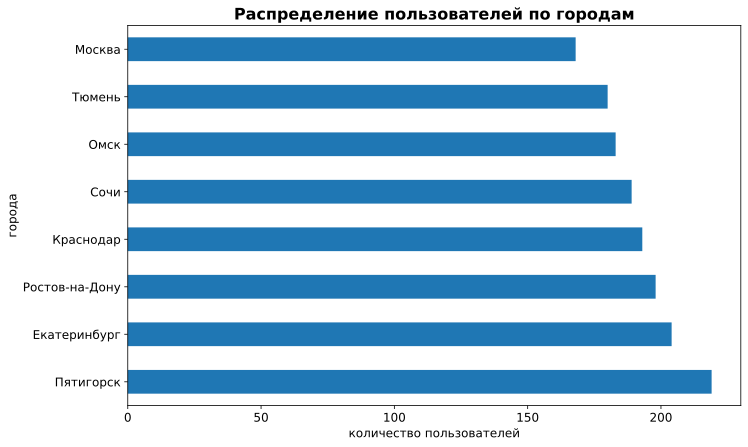

In [36]:
# Распределение пользователей по городам, нужна горизотнальная гистограмма для наглядности
users_go['city'].value_counts().plot(
    kind = 'barh', 
    y = users_city,
    title = 'Распределение пользователей по городам');
plt.xlabel('количество пользователей')
plt.ylabel('города')

In [37]:
# Рассчитаем доли городов
print('Доля города в процентах')
user_city = users_go['city'].value_counts()
user_city['share'] = round(user_city / user_city.sum(), 2) * 100
user_city['share'].to_frame()

Доля города в процентах


,city
Пятигорск,14.0
Екатеринбург,13.0
Ростов-на-Дону,13.0
Краснодар,13.0
Сочи,12.0
Омск,12.0
Тюмень,12.0
Москва,11.0


Промежуточный вывод:<br>
- распределение пользователей по городам примерно одинаковое;<br>
- больше всего пользователей в Пятигорске;<br>
- меньше всего - в Москве.<br>

Таким образом, Пятигорск наиболее часто встречается, на его долю приходится 14%, Москва - наименее с долей 11%.

<a id="3_2"></a>
### b) Соотношение пользователей с подпиской и без подписки

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [38]:
# Получим количество пользователей в соответствии с подпиской
count_subs = users_go['subscription_type'].value_counts().to_frame()
print('Количество пользователей с подпиской (True) и без (False):')
count_subs

Количество пользователей с подпиской (True) и без (False):


,subscription_type
False,835
True,699


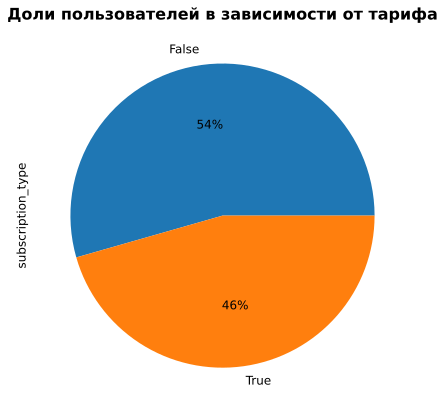

In [39]:
# Смотрим соотношение пользователей, используем круговую диаграмму для наглядности
users_go['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_subs, 
    autopct = '%1.0f%%', 
    title = 'Доли пользователей в зависимости от тарифа');

Промежуточный вывод:<br>
Пользователей без подписки всего 835, или 54% от общего количества клиентов. Их на 136 больше по сравнению с людьми, которые оформили подписвку ultra. Таким образом, больше половины зарегистрированных клиентов предпочитают арнедовать самокаты без подписки.

<a id="3_3"></a>
### c) Возраст пользователей

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [40]:
# Получим предельные значения возраста
print('Минимальный возраст :', users_go['age'].min())
print('Максимальный возраст:', users_go['age'].max())

Минимальный возраст : 12
Максимальный возраст: 43


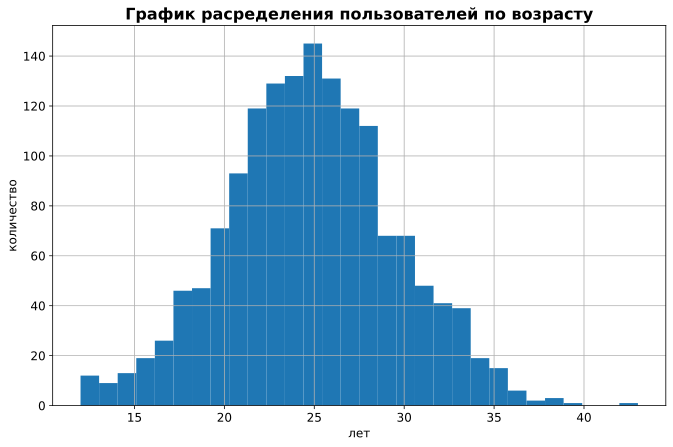

In [41]:
# Изучим пользователей по возросту, посмотрим выбросы
users_go['age'].hist(bins=30)
plt.title('График расределения пользователей по возрасту')
plt.xlabel('лет')
plt.ylabel('количество')
plt.show()

In [42]:
# Смотрим на параметры данных
users_go.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


Промежуточный вывод:<br>
Видно, что большая часть пользователей в возрасте от 20 до 30 лет, при этом нижняя граница на уровне 12 лет, а верхняя - на 43-х. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным и средним. Кривая имеет нормальное распределение.

<a id="3_4"></a>
### d) Расстояние, которое пользователь преодолел за одну поездку

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [43]:
# Порсмотрим на статистику данных
rides_go.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


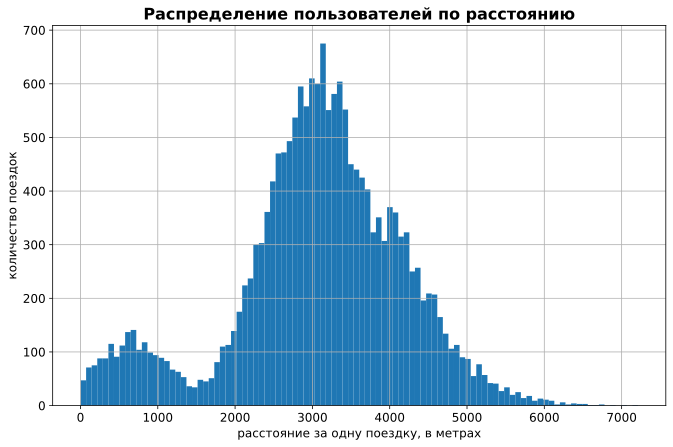

In [44]:
# Изучим пользователей по расстоянию поездок
rides_go['distance'].hist(bins=100)
plt.title('Распределение пользователей по расстоянию')
plt.xlabel('расстояние за одну поездку, в метрах')
plt.ylabel('количество поездок')
plt.show()

На графике видим два пика: ближняя дистанция в среднем 600-700 метров, и дальняя - 3100 метров. Значения одной поездки разбросаны от 1 до 7211 метров.<br>
Поищем самые короткие и самые длинные дистанции за одну поездку.

In [45]:
# Получим предельные значения расстояния поездок
print('Самая короткая:', "{:.2f}".format(rides_go['distance'].min()), 'м')
print('Самая длинная:', "{:.2f}".format(rides_go['distance'].max()), 'м')

Самая короткая: 0.86 м
Самая длинная: 7211.01 м


In [46]:
# Посмотрим на самые короткие поездки
round(rides_go['distance'].sort_values(), 2).head(10).to_frame()

,distance
11555,0.86
9541,2.57
13690,4.33
8658,6.78
7841,7.10
8906,11.28
8324,12.23
13940,15.00
15626,15.37
11862,15.63


In [47]:
# Теперь на самые длинные
round(rides_go['distance'].sort_values(), 2).tail(10).to_frame()

,distance
11319,6503.60
10915,6535.39
12086,6538.94
11385,6601.20
10341,6671.97
17242,6724.93
17171,6760.94
15580,6908.49
16484,7066.00
16309,7211.01


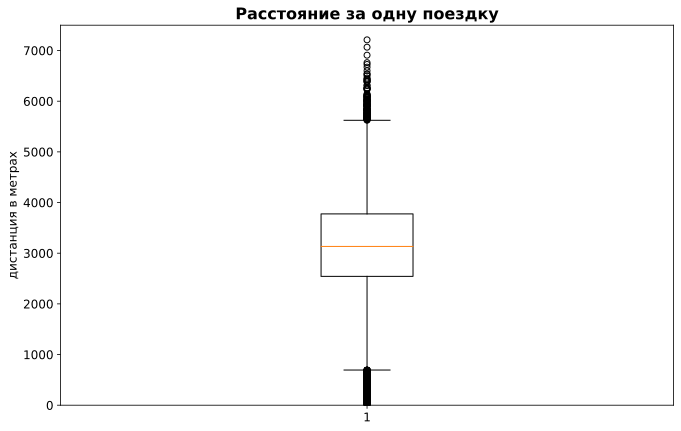

In [48]:
# Проверим на "ящике с усами" в дистанциях
plt.boxplot(x = rides_go.distance) # откуда берём данные для графика
plt.ylim(0,7500) # установим диапазон оси Y
plt.title('Расстояние за одну поездку')
plt.ylabel('дистанция в метрах')
plt.show()

Промежуточный вывод:<br>
Самое маленькое расстояние за поездку меньше метра (таких значений чуть меньше 100), самое большое - более 7.2 км. Большая часть пользователей проезжают 2.5-3,7 км. Медиана всех значений равна 3134 метра.

<a id="3_5"></a>
###e) Продолжительность поездок

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [49]:
# Ещё раз посмотрим на статистику данных о поездках
rides_go.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


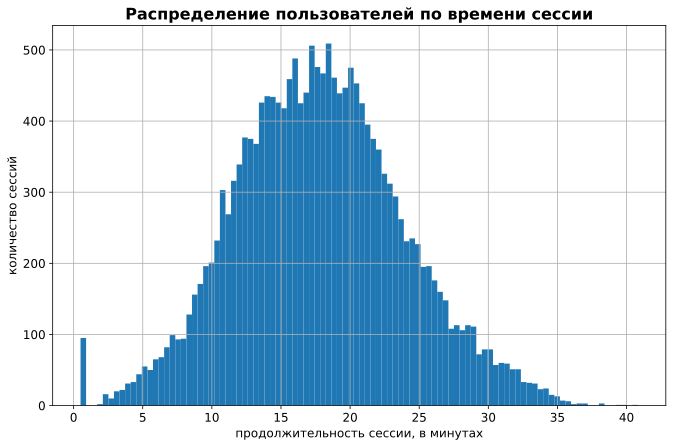

In [50]:
# Изучим пользователей по времени на сессию, посмотрим выбросы
rides_go['duration'].hist(bins=100)
plt.title('Распределение пользователей по времени сессии')
plt.xlabel('продолжительность сессии, в минутах')
plt.ylabel('количество сессий')
plt.show()

Этот график показывает выброс на позиции около 1 минуты, но большая часть сессий длилась 15-20 минут.

In [51]:
# Получим предельные значения длительности поездок (сессий)
print('Самая быстрая:', "{:.2f}".format(rides_go['duration'].min()), 'мин.')
print('Самая длительная:', "{:.2f}".format(rides_go['duration'].max()), 'мин.')

Самая быстрая: 0.50 мин.
Самая длительная: 40.82 мин.


In [52]:
# Ищем самые быстрые поездки и сколько их
round(rides_go['duration'].sort_values(), 2).head(10).to_frame()

,duration
12013,0.5
17314,0.5
15029,0.5
7437,0.5
12967,0.5
15015,0.5
13012,0.5
7508,0.5
16589,0.5
9049,0.5


Судя по таблице и графику, таких супер-быстрых поездок, дительностью меньше минуты, много. Разберёмся с ними позже.

In [53]:
# Получаем самые долгие поездки
round(rides_go['duration'].sort_values(), 2).tail(10).to_frame()

,duration
4653,36.62
6348,36.81
499,36.91
3729,37.01
143,38.13
6453,38.27
1998,38.35
2623,39.53
4709,39.87
4215,40.82


Много людей любят покататься на досуге.

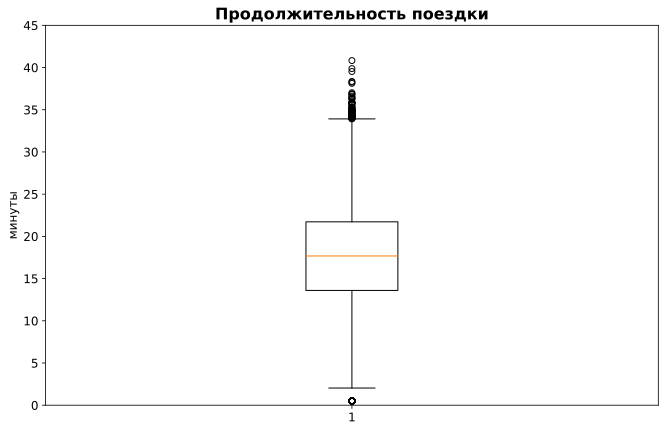

In [54]:
# Посмотрим в "ящик с усами"
plt.boxplot(x = rides_go.duration) # откуда берём данные для графика
plt.ylim(0,45) # установим диапазон оси Y
plt.title('Продолжительность поездки')
plt.ylabel('минуты')
plt.show()

Промежуточный вывод:<br>
Медианное значение и среднее практически совподают на отметке почти 18 минут. Длительность поездок нормально распределена по всему диапазону. Самая долгая поездка заняла 40 минут. В тоже время очень подозрительны почти 100 супер-быстрых поездок продолжительностью меньше полминуты.

In [55]:
rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [56]:
# Получим предельные значения скорости поездок
print('Самая маленькая скорость:', "{:.2f}".format(rides_go['distance'].min() / rides_go['duration'].min()), 'м/мин')
print('Самая большая скорость:', "{:.2f}".format(rides_go['distance'].max() / rides_go['duration'].max()), 'м/мин')

Самая маленькая скорость: 1.71 м/мин
Самая большая скорость: 176.64 м/мин


Здесь явно есть нереальные значения.

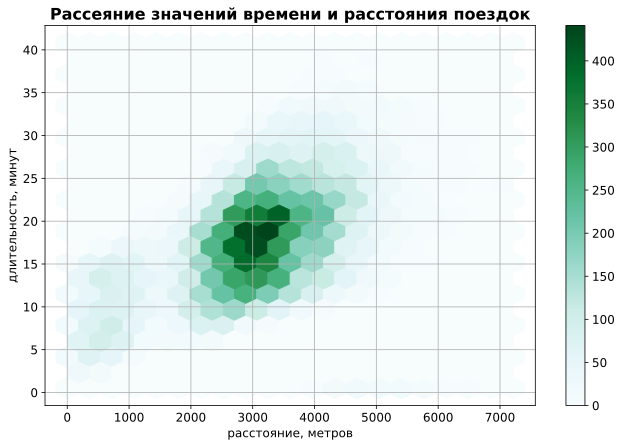

In [57]:
# Построим гистограмму плотности рассеяния
rides_go.plot(x='distance', y='duration', kind='hexbin', gridsize=20, sharex=False, grid=True, alpha=5)
plt.title('Рассеяние значений времени и расстояния поездок')
plt.ylabel('длительность, минут')
plt.xlabel('расстояние, метров')
plt.show()

In [58]:
# создадим датафейм скорости, но в км/ч
speed_rides_go = pd.DataFrame()
# перведём м/мин в км/ч: скорость умножим на 60 и разделим на 1000
speed_rides_go['speed'] = ((rides_go['distance'] / rides_go['duration']) * 60) / 1000
speed_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   18068 non-null  float64
dtypes: float64(1)
memory usage: 141.3 KB


In [59]:
# Посмотрим на статистику данных о скорости
speed_rides_go.describe()

,speed
count,18068.000000
mean,13.785261
std,44.156189
min,0.005133
25%,8.127843
50%,10.251135
75%,12.929800
max,865.320929


In [60]:
# Получим предельные значения скорости поездок
print('Самая маленькая:', "{:.2f}".format(speed_rides_go['speed'].min()), 'км/ч')
print('Самая большая:', "{:.2f}".format(speed_rides_go['speed'].max()), 'км/ч')

Самая маленькая: 0.01 км/ч
Самая большая: 865.32 км/ч


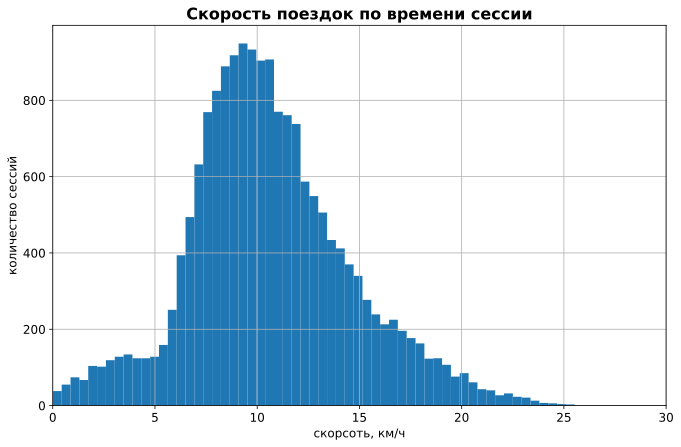

In [61]:
# Изучим скорость поездок
speed_rides_go['speed'].hist(bins=2000)
plt.xlim(0,30) # установим диапазон оси X
plt.title('Скорость поездок по времени сессии')
plt.xlabel('скорсоть, км/ч')
plt.ylabel('количество сессий')
plt.show()

Здесь видно, что средняя скорость 13.8 км/ч (230 м/мин), медиана - 10.2 км/ч (170.8 м/мин), Q1 - 8.1 км/ч (135.5 м/мин), Q3 - 12.9 км/ч (215.5 м/мин), минимум скорости - 8 см в минуту (0,08 м/мин), а макимум - 10.3 км/ч (172.2 м/мин).

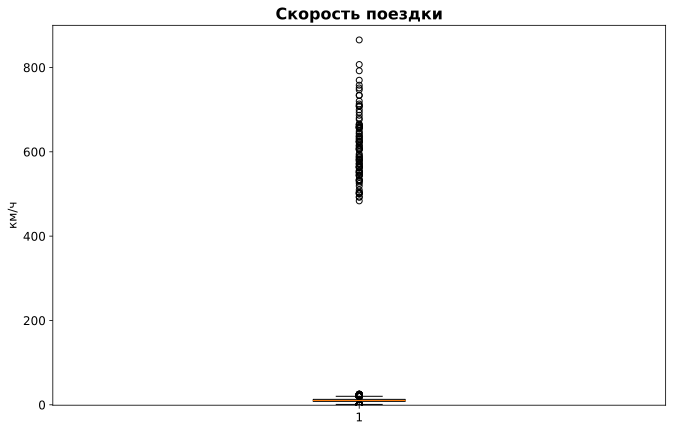

In [62]:
# Посмотрим в "ящик с усами" со всеми выбросами и аномалиями
plt.boxplot(x = speed_rides_go.speed) # откуда берём данные для графика
plt.ylim(-1,900) # установим диапазон оси Y
plt.title('Скорость поездки')
plt.ylabel('км/ч')
plt.show()

Аномалиями скорости, а значит и дистанции со временем, будем считать 30 км/ч (насамокатах стоит ограничение скорости). В тоже время у электросамокатов нет ограничения минимальной скорости, типа не ниже 3 км/ч (50 метров в минуту) - скорость прогуливающегося пешехода. Какой ток пользователь подал на колесо, так оно и двигается.

In [63]:
# Найдём количество значений скорости, больше реальных
max_speed_rides_go = []
max_speed_rides_go = speed_rides_go[speed_rides_go['speed'] > 20]
print('Количество аномально высоких значений скорости больше 20 км/ч:', len(max_speed_rides_go))
max_speed_rides_go = speed_rides_go[speed_rides_go['speed'] > 23]
print('Количество аномально высоких значений скорости больше 23 км/ч:', len(max_speed_rides_go))
max_speed_rides_go = speed_rides_go[speed_rides_go['speed'] > 24]
print('Количество аномально высоких значений скорости больше 24 км/ч:', len(max_speed_rides_go))
max_speed_rides_go = speed_rides_go[speed_rides_go['speed'] > 25]
print('Количество аномально высоких значений скорости больше 25 км/ч:', len(max_speed_rides_go))
max_speed_rides_go = speed_rides_go[speed_rides_go['speed'] > 30]
print('Количество аномально высоких значений скорости больше 30 км/ч:', len(max_speed_rides_go))
max_speed_rides_go = speed_rides_go[speed_rides_go['speed'] > 35]
print('Количество аномально высоких значений скорости больше 35 км/ч:', len(max_speed_rides_go))
max_speed_rides_go = speed_rides_go[speed_rides_go['speed'] > 100]
print('Количество аномально высоких значений скорости больше 100 км/ч:', len(max_speed_rides_go))

Количество аномально высоких значений скорости больше 20 км/ч: 447
Количество аномально высоких значений скорости больше 23 км/ч: 146
Количество аномально высоких значений скорости больше 24 км/ч: 111
Количество аномально высоких значений скорости больше 25 км/ч: 99
Количество аномально высоких значений скорости больше 30 км/ч: 95
Количество аномально высоких значений скорости больше 35 км/ч: 95
Количество аномально высоких значений скорости больше 100 км/ч: 95


Здесь видно, что в таблицах есть 95 строк со значениями больше 30 км/ч, значит такое ограничение скорости стоит на самокатах. Всё, что выше - нереальные аномалии, которые могут повлиять на результаты анализа. Причину появления аномально высокой скорости назвать затрудняюсь, можно опредположить, что ошибки в выгрузке данных по расстоянию или времени. На это нужно обратить внимание специалистов.

In [64]:
# Найдём количество значений скорости, меньше реальных
min_speed_rides_go = []
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 5]
print('Количество аномально низких значений скорости больше 5 км/ч:', len(min_speed_rides_go))
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 3]
print('Количество аномально низких значений скорости больше 3 км/ч:', len(min_speed_rides_go))
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 2]
print('Количество аномально низких значений скорости больше 2 км/ч:', len(min_speed_rides_go))
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 1.7]
print('Количество аномально низких значений скорости больше 1.7 км/ч:', len(min_speed_rides_go))
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 1.5]
print('Количество аномально низких значений скорости больше 1.5 км/ч:', len(min_speed_rides_go))
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 1]
print('Количество аномально низкихх значений скорости больше 1 км/ч:', len(min_speed_rides_go))
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 0.5]
print('Количество аномально низкихх значений скорости больше 0.5 км/ч:', len(min_speed_rides_go))
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 0.3]
print('Количество аномально низкихх значений скорости больше 0.3 км/ч:', len(min_speed_rides_go))
min_speed_rides_go = speed_rides_go[speed_rides_go['speed'] < 0.1]
print('Количество аномально низкихх значений скорости больше 0.1 км/ч:', len(min_speed_rides_go))

Количество аномально низких значений скорости больше 5 км/ч: 1129
Количество аномально низких значений скорости больше 3 км/ч: 553
Количество аномально низких значений скорости больше 2 км/ч: 305
Количество аномально низких значений скорости больше 1.7 км/ч: 226
Количество аномально низких значений скорости больше 1.5 км/ч: 191
Количество аномально низкихх значений скорости больше 1 км/ч: 117
Количество аномально низкихх значений скорости больше 0.5 км/ч: 42
Количество аномально низкихх значений скорости больше 0.3 км/ч: 22
Количество аномально низкихх значений скорости больше 0.1 км/ч: 7


Мы получили значения меньше скорости ленивого пешехода. Теоретически можно отсечь значения ниже 5 км/ч (6.2% от всех данных), но лучше ниже 3 км/ч, потому что их всего 3% и скорость 50 м/мин вполне допустима для электросамоката. И потом, клиенты могут остановиться, чтобы поговорить по телефону и т.п. Нужно изучать конкретно эти данные, чтоы понять причину их появления.

<a id="3_6"></a>
### ВЫВОДЫ ПО ШАГУ 3<br>

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Количество клиентов сервиса аренды самокатов примерно одинаково распределено по городам, быз аномальных значений. Больше всего в Пятигорске — 219 пользователей, минимум в Москве — 168. Скорее всего это связано с размерами городов, потому что в маленьком Пятигорске проще и дешевле доехать до нужного места на самокате, чем на такси или общественном транспорте.<br>
Больше половины клиентов не пользуются платной подпиской. Их 835, или 54.43% от общего числа пользователей. Приобрели подписку ultra на 136 человек меньше. В принципе, это обычная картина, когда бизнес предлагает альтернативу.<br>
Самокаты берут в аренду люди возрастом от 12 до 43 лет, но максимальное количество пользователей около медианного возраста 25 лет, он же является средним значением.<br>
Дистанции одной поездки разбросаны от 1 до 7211 метров. Медиана всех значений равна 3134 метра, среднее — 3070 метров. При этом на графике по этим данным есть два пика: левый малый — около 700 метров, правый большой — около 3200 метров. Между пиками значения нормально распределены. Но есть около сотни строк с расстоянием поездки менее метра.<br>
Такой же выброс менее 100 поездок продолжительностью в 1 минуту есть в данных о времени сессий. В то же время у этих аномалий с большой долей вероятности могут быть две причины: пользователи отказались от поездки и техническая неисправность самоката. Сбой при выгрузке данных имеет мало шансов.<br>
Общие данные длительности поездок нормально распределены от 0 до 41 минуты. Наиболее распространенным временем сессии является 18 минут, там же медианное значение и среднее.

<a id="4"></a>
## Шаг 4. ОБЪЕДИНЕНИЕ ДАННЫХ

<a id="4_1"></a>
### a) Сводим данные о пользователях, поездках и подписках в один датафрейм

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [65]:
# Создаём общий датафрейм со сводными данными из трёх таблиц
full_go = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')
full_go.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,True,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,True,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,True,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,True,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,True,748.690645,15.041884,2021-11-22,11,6,0,199


Проверим корректность данных в новом датафрейме - количество значений в обоих должно совпадать, потому что в исходных таблицах нет пропусков. То есть в созданном тоже не должно быть пропусков.

In [66]:
if rides_go['user_id'].count() == full_go['user_id'].count():
    print("Количество строк в rides_go и full_go совпадает и равно", full_go['user_id'].count())
else:
    print("Количество строк в rides_go и full_go расходится на", rides_go['user_id'].count() - full_go['user_id'].count())
print()
if len(users_go['user_id'].unique()) == len(full_go['user_id'].unique()):
    print("Число уникальных пользователей в rides_go и full_go совпадает и равно", len(full_go['user_id'].unique()))
else:
    print("Количество строк в rides_go и full_go расходится на", len(full_go['user_id'].unique()) - len(users_go['user_id'].unique()))

Количество строк в rides_go и full_go совпадает и равно 18068

Число уникальных пользователей в rides_go и full_go совпадает и равно 1534


Сведение данных прошло корректно.

<a id="4_2"></a>
### b) Создаём ещё два датафрейма из созданного на предыдущем этапе:

In [67]:
# Новая таблица с данными пользователями с подпиской
subs_go = full_go.loc[full_go['subscription_type'] == True]
# Данные пользователей без подписки
free_go = full_go.loc[full_go['subscription_type'] == False]

<a id="4_2_1"></a>
### - c данными о пользователях с подпиской

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [68]:
# Проверим с подпиской
print('Сведения о таблице:')
subs_go.info()
print('Статистика датафрейма:')
subs_go.describe()

Сведения о таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   uint16        
 1   name               6500 non-null   object        
 2   age                6500 non-null   uint8         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   bool          
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   uint8         
 10  start_ride_price   6500 non-null   uint8         
 11  subscription_fee   6500 non-null   uint8         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(2), uint16(1), uint8(4)
memory usage: 

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


In [69]:
# Посмотрим данные
subs_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8,6,0,199


<a id="4_2_2"></a>
### - с данными о пользователях без подписки

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [70]:
# Проверим без подписки
print('Сведения о таблице:')
free_go.info()
print('Статистика датафрейма:')
free_go.describe()

Сведения о таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  uint16        
 1   name               11568 non-null  object        
 2   age                11568 non-null  uint8         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  bool          
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  uint8         
 10  start_ride_price   11568 non-null  uint8         
 11  subscription_fee   11568 non-null  uint8         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(2), uint16(1), uint8(4)
memory us

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


In [71]:
# Посмотрим без подписки
free_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,False,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,False,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,False,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,False,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,False,3047.379435,17.427673,2021-02-14,2,8,50,0


<a id="4_3"></a>
### c) Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [72]:
# Найдём разницу значений двух новых датафреймов
print("Разница между числовыми столбцами датафреймов free_go и ultra_go") 
free_go.describe() - subs_go.describe()

Разница между числовыми столбцами датафреймов free_go и ultra_go


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.0,5068.0,5068.0
mean,771.801846,0.000711,-69.950106,-1.151076,0.100687,2.0,50.0,-199.0
std,40.066290,-0.276108,409.278476,0.754755,0.035154,0.0,0.0,0.0
min,699.000000,0.000000,-243.354755,-3.260353,0.000000,2.0,50.0,-199.0
25%,740.000000,0.000000,-418.881328,-1.566217,0.000000,2.0,50.0,-199.0
50%,772.000000,0.000000,-33.988764,-0.851263,1.000000,2.0,50.0,-199.0
75%,803.000000,0.000000,345.123469,-0.290058,0.000000,2.0,50.0,-199.0
max,835.000000,5.000000,1511.238083,-5.875464,0.000000,2.0,50.0,-199.0


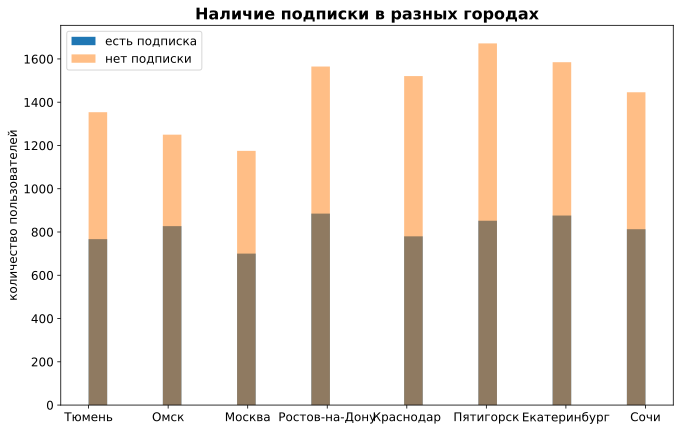

In [73]:
# Посмотрим, как с подпиской в городах
plt.hist(subs_go.city, label='есть подписка', bins=30)
plt.hist(free_go.city, label='нет подписки', bins=30, alpha=0.5)
plt.legend()
plt.ylabel('количество пользователей')
plt.title('Наличие подписки в разных городах')
plt.show()

Клиенты во всех городах предпочитают пользоваться без подписки. Пятигорск является лидером по использованию самокатов, но н на первом месте по покупке подписки. Лидером по использованию подписки является Ростов-на-Дону, а вот без подписки предпочитают кататься в Москве.

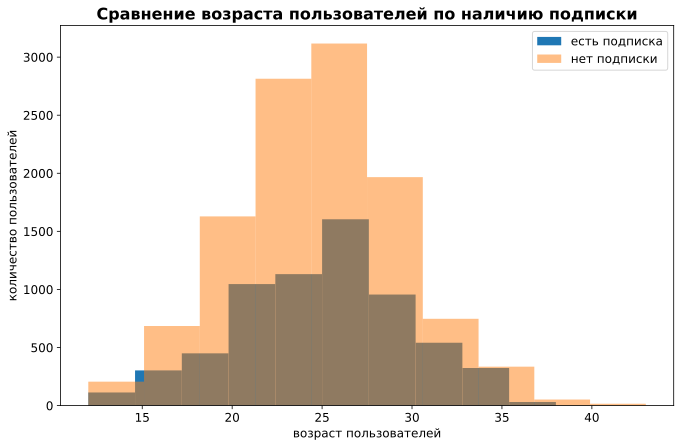

In [74]:
# Сравним на общем графике возраст пользователей по наличию подписки
plt.hist(subs_go.age, label='есть подписка', bins=10)
plt.hist(free_go.age, label='нет подписки', bins=10, alpha=0.5)
plt.legend()
plt.xlabel('возраст пользователей')
plt.ylabel('количество пользователей')
plt.title('Сравнение возраста пользователей по наличию подписки')
plt.show()

Значеня возраста пользователей с подпиской и без схожи, но максимальный на 5 лет больше у пользователей без подписки и равен 43 годам.

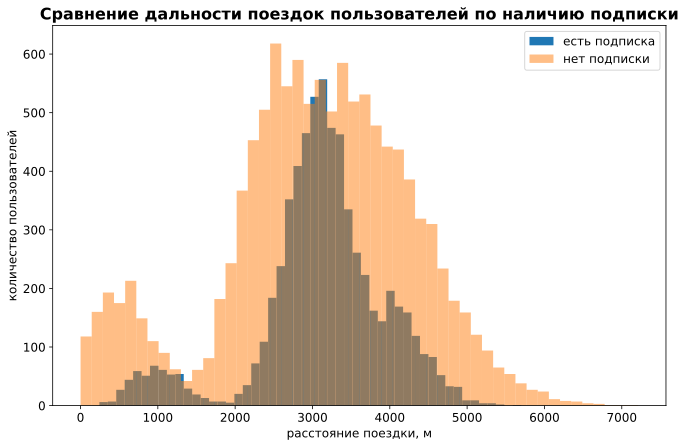

In [75]:
# Посмотрим на общем графике расстояние поездок по наличию подписки
plt.hist(subs_go.distance, label='есть подписка', bins=50)
plt.hist(free_go.distance, label='нет подписки', bins=50, alpha=0.5)      
plt.legend()
plt.xlabel('расстояние поездки, м')
plt.ylabel('количество пользователей')
plt.title('Сравнение дальности поездок пользователей по наличию подписки')
plt.show()

Протяжённость поездок без подписки более разнообразна и больше по сравнению с подпиской ultra. Например, максимальное расстояние больше на 1511 метров, а минимальное меньше на 243 метра. Стандартное отклонение в данных без подписки больше на 409 метров, по сравнению с подпиской. Средняя дистанция без подписки короче на 70 м, а медианное значене меньше на 34 метра.<br>
На графике сравнения обеих подписок видны два пика. Маленький пик на коротких дистанциях и большой — на длинных дистанциях. Меньший пик значений с подпиской ultra на отметке около 1000 метров, а большой — около 3100 метров со снижением до 4000 метров. Маленький пик без подписки стоит около значений 700 метров, а основной — «двухголовый» на отметках 2500 и 3500 метров. В целом пики значений с подпиской ultra более выраженные с меньшим разрбосом.

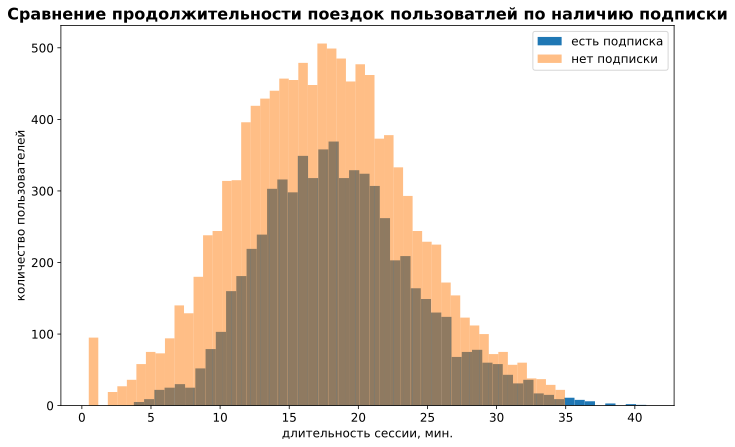

In [76]:
# Построим график длительности поездок по наличию подписки
plt.hist(subs_go.duration, label='есть подписка', bins=50)
plt.hist(free_go.duration, label='нет подписки', bins=50, alpha=0.5)      
plt.legend()
plt.xlabel('длительность сессии, мин.')
plt.ylabel('количество пользователей')
plt.title('Сравнение продолжительности поездок пользоватлей по наличию подписки')
plt.show()

Пик количества поездок находится на отметке 17-18 минут и с подпиской, и без неё. Длительность сессий в поездках без подписки немного меньше по всем показателям по сравнению с использованием подписки ultra. Так минимальное значение меньше на 3.26 минуты, а максимальное меньше на 5.87 минуты. Медианное значение меньше на 0.85 минуты, а среднее — на 1.15 минуты.<br>
При этом около отметки 1 минуты наблюдается пик времени сессий без подписки в объёме примерно 100 поездок. Такой аномалии нет в поездках по подписке. Это значит, что, с большой долей вероятности, такой выброс связан с отказом пользователей. Если бы была неисправность самокатов, то эти случаи появились бы в данных с подпиской.

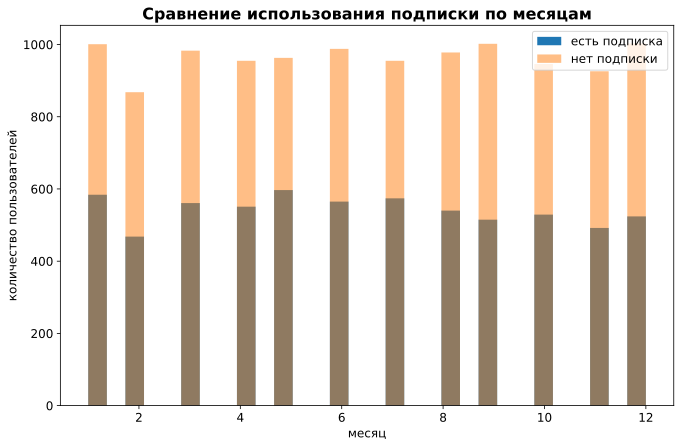

In [77]:
# Изучим график сезонности поездок по наличию подписки
plt.hist(subs_go.month, label='есть подписка', bins=30)
plt.hist(free_go.month, label='нет подписки', bins=30, alpha=0.5)      
plt.legend()
plt.xlabel('месяц')
plt.ylabel('количество пользователей')
plt.title('Сравнение использования подписки по месяцам')
plt.show()

Данные по подписке в разных месяцах схожи за исключением медианы, которая у пользователей ultra приходится на июнь, а без подписки на июль. Без изменений видны спады активности в феврале и ноябре-декабре. Максимум поездок с подпиской в мае, без подписки — в январе, сентябре и декабре (с минимальной разницей). Поездки с подпиской ultra подвержены сезонности — их количество растёт с февраля по май, а затем медленно снижается до ноября.

<a id="4_4"></a>
### ВЫВОДЫ ПО ШАГУ 4<br>

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

__Количество__. Клиенты совершили на 5068 поездок больше без подписки, чем с использованием подписки ultra составляет. Разница составляет более 30%.<br>
__Города__. Везде пользователи предпочитают брать самокаты без подписки. Лидером здесь является Пятигорск (1672 поездок), а Ростов-на-Дону первый по использованию подписки ultra (885 поездок).<br>
__Возраст__. Пользователи с подпиской по возрасту схожи с пользователями без подписки. Различие только в максимальном возрасте, который на 5 лет больше у пользователей без подписки, что может говорить о нежелании взрослых людей тратить деньги на преимущества для редких поездок.<br>
__Расстояние__. Поездки без подписки имеют максимальное значение больше на 1511 метров, а минимальное на 243 метра меньше по сравнению с поездками по подписке ultra. Стандартное отклонение также отличается на 409 метров. Среднее расстояние без подписки короче на 70 метров, а медиана на 34 метра по сравнению с подпиской.<br>
__Длительность__. Время поездок без подписки меньше по всем показателям относительно значений с ultra. Больше всего поездок длительностью 17-18 минут. При этом без подписки есть около 100 случаев продолжительностью около 1 минуты (о причинах см. выше).<br>
__Месяцы__. Пользование самокатами без подписки и с подпиской схоже во все сезоны. Исключение здесь медианное значение, которая у подписчиков с ultra находится в июне, а у пользователей без подписки — в июле. При этом наблюдаются спады активности клиентов в феврале и ноябре-декабре. Максимум поездок с подпиской в мае — 597, или 3.3% от всех поездок, без подписки — в январе (1001 поездка, или 5.54% от общего количества), сентябре (1002 поездки) и декабре (1003 поездки).

<a id="5"></a>
## Шаг 5. ПОДСЧЁТ ВЫРУЧКИ

Сначала нужно найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [78]:
# Округлим в общей таблице full_go длительность поездок в duration
full_go['duration'] = np.ceil(full_go['duration'])

<a id="5_1"></a>
### a) Создаём датафрейм с агрегированными данными о поездках на основе объединённого

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [79]:
# Новый датафрейм с агрегированными данными о поездках на основе объединённого
joint_go = full_go.pivot_table(
    index=('user_id', 'month'), 
    values=('distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'), 
    aggfunc=('count', 'sum'))
# Настроим отображение таблицы и удалим дублирующую информацию
joint_go.columns = [
    'amount', 'distance', 
    'du', 'duration', 
    'mp', 'minute_price',
    'srp', 'start_ride_price', 
    'sf', 'subscription_fee'
]
# Подсчитаем количество строк и уберём повторы столбцов
joint_go = joint_go.drop(['du', 'mp', 'srp', 'sf'], axis=1)
# Настроим финансовые столбцы
joint_go['start_ride_price'] = joint_go['start_ride_price'] / joint_go['amount']
joint_go['minute_price'] = joint_go['minute_price'] / joint_go['amount']
joint_go['subscription_fee'] = joint_go['subscription_fee'] / joint_go['amount']
joint_go.head(10)

amount      distance  duration  minute_price  start_ride_price  \
user_id month                                                                   
1       1           2   7027.511294      42.0           6.0               0.0   
        4           1    754.159807       7.0           6.0               0.0   
        8           2   6723.470560      46.0           6.0               0.0   
        10          2   5809.911100      32.0           6.0               0.0   
        11          3   7003.499363      56.0           6.0               0.0   
        12          2   6751.629942      28.0           6.0               0.0   
2       3           3  10187.723006      63.0           6.0               0.0   
        4           2   6164.381824      40.0           6.0               0.0   
        6           1   3255.338202      14.0           6.0               0.0   
        7           2   6780.722964      48.0           6.0               0.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0  
        12                199.0  
2       3                 199.0  
        4                 199.0  
        6                 199.0  
        7                 199.0

In [80]:
# Прверим таблицу на помесячной сортировке
joint_go.sort_values(by='month').head(10)

,,amount,distance,duration,minute_price,start_ride_price,subscription_fee
user_id,month,,,,,,
1,1,2,7027.511294,42.0,6.0,0.0,199.0
686,1,3,9891.825690,53.0,6.0,0.0,199.0
685,1,2,4837.670420,47.0,6.0,0.0,199.0
682,1,1,2929.820795,25.0,6.0,0.0,199.0
680,1,1,3316.977004,18.0,6.0,0.0,199.0
679,1,2,6407.866143,38.0,6.0,0.0,199.0
675,1,1,3907.983157,21.0,6.0,0.0,199.0
674,1,1,2952.626152,11.0,6.0,0.0,199.0
673,1,1,3371.773487,24.0,6.0,0.0,199.0


<a id="5_2"></a>
### b) Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

In [81]:
# Расчёт выручки и округление значений
joint_go['gains'] = (
    (joint_go['start_ride_price'] * joint_go['amount']) 
    + (joint_go['minute_price'] * joint_go['duration']) 
    + joint_go['subscription_fee']
)
joint_go.head(10)

amount      distance  duration  minute_price  start_ride_price  \
user_id month                                                                   
1       1           2   7027.511294      42.0           6.0               0.0   
        4           1    754.159807       7.0           6.0               0.0   
        8           2   6723.470560      46.0           6.0               0.0   
        10          2   5809.911100      32.0           6.0               0.0   
        11          3   7003.499363      56.0           6.0               0.0   
        12          2   6751.629942      28.0           6.0               0.0   
2       3           3  10187.723006      63.0           6.0               0.0   
        4           2   6164.381824      40.0           6.0               0.0   
        6           1   3255.338202      14.0           6.0               0.0   
        7           2   6780.722964      48.0           6.0               0.0   

               subscription_fee  gains  
user_id month                           
1       1                 199.0  451.0  
        4                 199.0  241.0  
        8                 199.0  475.0  
        10                199.0  391.0  
        11                199.0  535.0  
        12                199.0  367.0  
2       3                 199.0  577.0  
        4                 199.0  439.0  
        6                 199.0  283.0  
        7                 199.0  487.0

In [82]:
# Посмотрим на датафрейм
joint_go.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount            11331 non-null  int64  
 1   distance          11331 non-null  float64
 2   duration          11331 non-null  float64
 3   minute_price      11331 non-null  float64
 4   start_ride_price  11331 non-null  float64
 5   subscription_fee  11331 non-null  float64
 6   gains             11331 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 665.0 KB


In [83]:
# Изменим типы данных и снизим потребление памяти
joint_go['amount'] = joint_go['amount'].astype('uint16')
joint_go['gains'] = joint_go['gains'].astype('uint16')
joint_go.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount            11331 non-null  uint16 
 1   distance          11331 non-null  float64
 2   duration          11331 non-null  float64
 3   minute_price      11331 non-null  float64
 4   start_ride_price  11331 non-null  float64
 5   subscription_fee  11331 non-null  float64
 6   gains             11331 non-null  uint16 
dtypes: float64(5), uint16(2)
memory usage: 532.3 KB


In [84]:
# Уберём ненужную информацию для наглядности
joint_go = joint_go.drop(['start_ride_price', 'minute_price'], axis=1)
joint_go.head(10)

amount      distance  duration  subscription_fee  gains
user_id month                                                         
1       1           2   7027.511294      42.0             199.0    451
        4           1    754.159807       7.0             199.0    241
        8           2   6723.470560      46.0             199.0    475
        10          2   5809.911100      32.0             199.0    391
        11          3   7003.499363      56.0             199.0    535
        12          2   6751.629942      28.0             199.0    367
2       3           3  10187.723006      63.0             199.0    577
        4           2   6164.381824      40.0             199.0    439
        6           1   3255.338202      14.0             199.0    283
        7           2   6780.722964      48.0             199.0    487

<a id="5_3"></a>
### ВЫВОДЫ ПО ШАГУ 5

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Создали новый датафрейм с агрегированными данными __joint_go__ на основе датафрейма с объединёнными данными __full_go__. Рассчитали суммарное расстояние, количество поездок и общее время для каждого пользователя за каждый месяц. Создали дополнительный столбец с выручкой за месяц, которую принес каждый пользователь.

<a id="6"></a>
## Шаг 6. ПРОВЕРКА ГИПОТЕЗ

<a id="6_1"></a>
### a) Тратят ли пользователи с подпиской больше времени на поездки и «выгоднее» ли они для компании

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Определимся с нулевой и альтернативной гипотезами.<br>
Если пользователи с подпиской дольше арендуют самокаты, то они выгоднее для компании. Для проверки возьмём данные о каждой сессии отдельно для подписчиков и пользователей без подписки.<br>
Н0: Среднее время поездок с подпиской и без равны.<br>
Н1: Среднее время поездок с подпиской ultra больше, чем без подписки.<br>
alpha = 0.05

In [85]:
# Cравним датафреймы пользователей с подпиской и без неё
subs_go.equals(free_go)

False

In [86]:
from statistics import variance 
# считаем выборочную дисперсию с подпиской ultra
variance(subs_go['duration'])

31.047722583624388

In [87]:
# считаем выборочную дисперсию без подписки
variance(free_go['duration'])

40.02843442407168

Значит выборки для прроверки гипотез не идентичны и разного размера, поэтому аргумент equal_var будем менять на False, потому что он задаёт, считать ли равными дисперсии выборок (True — считать, False — не считать).

In [88]:
# Посчитаем и сравним гипотезы
subs_ultra = subs_go['duration']
subs_free = free_go['duration']
alpha = .05
hypot = st.ttest_ind(subs_ultra, subs_free, equal_var=False, alternative='greater')
print(hypot.pvalue)
if hypot.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.6757813771289775e-37
Отвергаем нулевую гипотезу


In [89]:
# Посчитаем и сравним гипотезы
subs_ultra = subs_go['duration']
subs_free = free_go['duration']
alpha = .05
hypot = st.ttest_ind(subs_ultra, subs_free, alternative='greater')
print(hypot.pvalue)
if hypot.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Кстати, смена аргумента equal_var не меняет результат теста - верность альтернативной гипотезы, которая содержит знак >.

Гипотеза о равности среднего времени поездок с подпиской ultra и без неё несостоятельна. То есть, можно сказать, что клиенты с подпиской ездят на самокатах дольше, чем без подписки.

<a id="6_2"></a>
### b) Проверяем среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, и не превышает ли оно 3130 метров

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Расстояние 3130 метров — оптимальное с точки зрения износа самоката.<br>
Определим гипотезу — расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров.<br>
Нулевая и альтернативная гипотезы:<br>
Н0: Среднее расстояние поездок с подпиской ultra меньше или равно 3130 метрам.<br>
Н1: Среднее расстояние поездок с подпиской больше 3130 метров.<br>
alpha = 0.05

In [90]:
# Посчитаем и сравним гипотезы для расстояния с подпиской
alpha = .05
hypot = st.ttest_1samp(subs_go['distance'], 3130, alternative='greater')
print(hypot.pvalue)
if hypot.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


После проверки гипотез нельзя сказать, что пользователи с подпиской ultra проезжают расстояние больше 3130 метров.

In [91]:
# Сравним гипотезы для расстояния без подписки
# Н0: Среднее расстояние поездок без подписки меньше или равно 3130 метрам
# Н1: Среднее расстояние поездок без подписки больше 3130 метров
alpha = .05
hypot_free = st.ttest_1samp(free_go['distance'], 3130, alternative='greater')
print(hypot.pvalue)
if hypot_free.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Это значит, что пользователи без подписки также проезжают расстояние в среднем не больше 3130 метров.

<a id="6_3"></a>
### c) Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Определим гипотезу: помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.<br>
Нулевая и альтернативная гипотезы:<br>
Н0: Средняя выручка от поездок с подпиской и без неё одинакова.<br>
Н1: Средняя выручка от поездок с подпиской больше, чем выручка без подписки.<br>
alpha = 0.05

In [92]:
gain_ultra = joint_go.loc[joint_go['subscription_fee'] > 0, 'gains']
gain_free = joint_go.loc[joint_go['subscription_fee'] == 0, 'gains']

In [93]:
# Cравним выборки выручки от пользователей с подпиской и без неё
gain_ultra.equals(gain_free)

False

In [94]:
from statistics import variance 
# считаем выборочную дисперсию с подпиской ultra
variance(gain_ultra)

7790.31073335113

In [95]:
# считаем выборочную дисперсию без подписки
variance(gain_free)

33807.56269650313

Выборки для прроверки гипотез не идентичны и разного размера, поэтому аргумент equal_var будем менять на False.

In [96]:
# Посчитаем и сравним гипотезы
alpha = .05
hypot = st.ttest_ind(gain_ultra, gain_free, equal_var=False, alternative='greater')
print(hypot.pvalue)
if hypot.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

8.874140893976874e-40
Отвергаем нулевую гипотезу


In [97]:
# Проверим с другим аргументом
alpha = .05
hypot = st.ttest_ind(gain_ultra, gain_free, alternative='greater')
print(hypot.pvalue)
if hypot.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проверка показала, что утверждение о равности средней выручки от поездок с подпиской и без неё не подтверждается. То есть, выручка от поездок с ultra превышает выручку от пользователей без подписки, а значит подписку нужно развивать и продвигать.

<a id="6_4"></a>
### d) Проверяем количество обращений в техподдержку после обновления серверов, с которыми взаимодействует мобильное приложение

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Задача:<br>
Техническая команда обновила серверы для работы мобильного приложения аренды самокатов и надеется, что количество обращений в техподдержку значимо снизилось. Есть файл с данными по каждому пользователю о количестве обращений до обновления и после. Какой тест понадобится для проверки этой гипотезы?

Ответ:<br>
Сначала сравним выборки на соответствие уникальных пользователей в них. Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок, где<br>
H0 : μ1 = μ2<br>
H1 : μ1 != μ2<br>
здесь μ1 и μ2 — средние значения количества обращений в техподдержку до и после обновления серверов. Если данные совпадают, то выборки зависимы и для проверки потребуется Т-тест для парных образцов: <br>
st.ttest_rel(before, after, alternative=’less’)<br>
В противном случае, выборки не могут быть зависимы и нужен тест:<br>
st.ttest_ind(before, after, equal_var=False, alternative=’less’) <br>
где аргумент equal_var=False, так как выборки не равны, а аргумент alternative=’less’, потому что нулевая гипотеза отвергается при условии, что обращений было меньше, чем после обновления серверов.

## Шаг 7. РАСПРЕДЕЛЕНИЯ<a id="7"></a>

<a id="7_1"></a>
### a) Выясняем, какое минимальное количество промокодов нужно разослать в ходе акции, чтобы вероятность не выполнить план была примерно 5 %

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.<br>
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.<br>
Подсказка:<br>
Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() , сформулировать вывод и ответ.

In [98]:
# Нужна функция расчёта успеха в экспериментах Бернулли аппроксимацией биномиального распределения нормальным
def calc_exp(n, p, x):
# Обозначения и параметры биноминального распределения:
# calc_exp - calculation of experiments, подсчёт экспериментов
# n - количество экспериментов,
# p - вероятность успеха,
# x - вероятность получения расчитываемого значения неуспеха
# Получаем параметры нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
# Получаем нормальное распределение
    norm_distr = st.norm(mu, sigma)
# Находим значения для заданной вероятности x
    given_prob = norm_distr.ppf(x) # левосторонний тест для получения величины больше заданной, метод cdf тут не подходит
# График
    arange = np.arange( # получаем равномерно распределённые значения в заданном интервале
        (mu - 4 * sigma), # начало интервала
        (mu + 4 * sigma), # конец интервала
        1 # шаг, dtype не указываем, метод получит его из типов start, stop и step
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), '--')
    plt.axvline(x=given_prob, color='red') # отметим нужное значение
    plt.xlabel('количество клиентов')
    plt.ylabel('вероятность неуспеха')
    plt.grid()
    plt.show()
    return given_prob

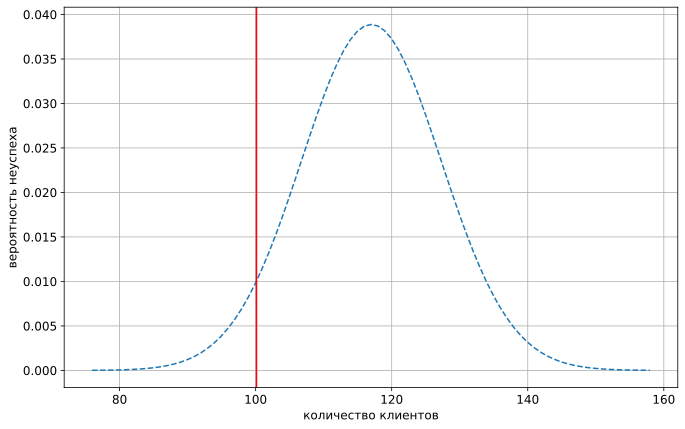

100.12120484998272

In [99]:
# Строим график из функции по заданным параметрам
# количество экспериментов - любое значение методом подбора до совпадения границы левого хвоста и требуемого числа клиентов
# вероятность успеха - 10% продлевают подписку
# вероятность получения неуспеха - 5% не выполнить план
calc_exp(1170, .1, .05)

Надо разослать клиентам 1169 промокодов для продления подписки с вероятностью 10% и чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.

<a id="7_2"></a>
### b) Строим график распределения и оценим вероятность того, что Push-уведомление откроют не более 399,5 тыс. пользователей

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.
Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Вы можете воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

In [100]:
# Функция расчета вероятности проведения успешных экспериментов Бернули
# путем аппроксимации биномиального распределения нормальным
def calc_prob(n, p, x):
# Обозначения и параметры биноминального распределения:
# calc_prob - calculation of the probability, вычисление вероятности
# n - количество экспериментов
# p - вероятность успеха
# x - значение, для которого рассчитывается вероятность
# Получаем параметры нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
# Получаем нормальное распределение
    norm_distr = st.norm(mu, sigma)
# Находим вероятность для заданного x
    prob_hit = norm_distr.cdf(x) # значений, распределения которых меньше заданной величины
# Строим график
    arange = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), '--')
    plt.axvline(x=x, color='red') # отметим заданное значение
    plt.xlabel('количество клиентов')
    plt.ylabel('вероятность успеха')
    plt.grid()
    plt.show()
    return prob_hit

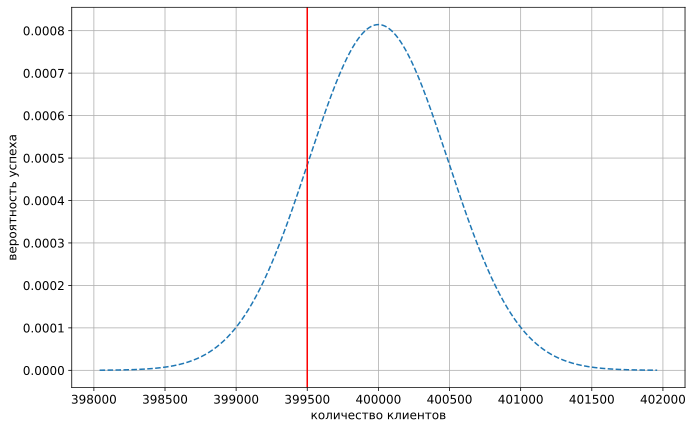

0.15371708296369768

In [101]:
# Строим график из функции по заданным параметрам
# количество экспериментов - 1 млн уведомлений
# вероятность успеха - 40% открывают сообщение
# вероятность получения заданного значения - уведомление откроют не более 399,5 тыс. пользователей
calc_prob(1000000, .4, 399500)

Нужный результат — 399.5 тыс. клиентов откроют уведомления — имеет вероятность 15.37% при рассылке 1 млн уведомлений, когда 40% клиентов открывают сообщения.

<a id="7_3"></a>
### ВЫВОДЫ ПО ШАГУ 7

Для решения обеих задач понадобилось написать две похожих функции, но с разными методами: в первой нам нужен pdf() для функции плотности вероятности, во второй - cdf() для функции кумулятивного распределения.

<a id="8"></a>
## ОБЩИЙ ВЫВОД

[Описание данных](#0_0)<br>
[Содержание](#0_1)<br>

Цель проекта достигнута: __проведён анализ__ данных сервиса аренды самокатов GoFast и __проверены гипотезы__, которые могут помочь развитию бизнеса. [Пошаговый порядок работы здесь](#0_1).<br>
В полученных исходных данных есть информация о пользователях, их поездках и подписках, которые сгруппированы в три файла ([описание данных смотри тут](#0_0)).<br>
В ходе выполнения проекта были __скорректированы неоптимальные типы данных__ столбцов, __добавлены нужные столбцы__ для последующих вычислений, найдены и __обработаны неявные дубликаты__, проверены результаты предобработки данных.<br>
Все исходные данные были __без пропусков и явных дубликатов__, кроме обнаруженных в данных пользователей.<br>
На этапе исследовательского анализа мы вычислили частоту встречаемости городов, соотношение пользователей с подпиской и без неё, изучили возраст пользователей, пройденное за одну поездку расстояние и продолжительность поездок.<br>
Было выяснено, что пользователей __без подписки 835 человек__, или 54.43% от общего количества. Клиентов __с подпиской «ultra» меньше на 136 человек__.<br>
Возраст клиентов от 12 до 43 лет, но __больше всего__ пользователей в возрасте __25 лет__, это же значение является медианным.<br>
Больше всего поездок было __в Пятигорске — 219__, меньше всего — __168 — в Москве__. Во всех городах __клиенты предпочитают ездить без подписки__. По использованию подписки __«ultra»__ лидером является __Ростов-на-Дону (885 поездок)__, а без подписки — __Пятигорск (1672 поездок)__.
Дистанция поездок разбросана от 1 до 7211 метров, медиана этих значений — 3134 метра. На графике расстояния поездок __выделяются два пика__: маленький около значения __700 метров__, и большой — __около 3200 метров__. Между ними значения нормально распределены.<br>
Время поездок нормально распределено от 0 до 41 минуты. Наиболее распространенным и медианным значением является __18 минут__. При этом присутствет __выброс объёмом менее 100 поездок продолжительностью менее 1 минуты__<br>.
Затем все данные о пользователях, поездках и подписках были __объединены методом merge() в один датафрейм__. После чего на основе объединённого датафрейма создали ещё __две таблицы__: данные пользователи с подпиской и без неё. Также были построены графики для наглядности данных из этих разделённых датафреймов.<br>
На этапе подсчёта выручки были агрегированы данные по пользователям на основе общего датафрейма, добавлен столбец с расчётом помесечной выручки по каждому пользователю.<br>
Группировка данных показала, что у пользователей с подпиской и без неё __возраст схож__, за исключением максимального, который __на 5 лет больше у пользователей без подписки__.<br>
Количество поездок __без подписки__ составляет 11568, что __на 5068 больше__ по сравнению с подпиской «ultra». Клиенты без подписки ездят на разные расстояния, у пользователей с подпиской разнооразия меньше, значит они чаще пользуются конкретными маршрутами.<br>
Максимальная протяжённость маршрута у поездок без подписки __на 1511 метров больше__, чем с подпиской, минимальная — __на 243 метра меньше__. Это подтверждает стандартное отклонение, которое без подписки __больше на 409 метров__ по сравнению с показателем подписки «ultra». Среднее расстояние без подписки __короче на 70 метров__, а медиана __на 34 метра__ против значений с подпиской.<br>
На графиках с подпиской и без неё наблюдается __два пика__: первый небольшой в подписке «ultra» находится в районе __1000 метров__, боьшой в районе __3100 метров__ с небольшой коррекцией __до 4000 метров__; первый менший пик без подписки на отметке __700 метров__, а большой в зоне __2500-3500 метров__. При этом пики графиков расстояния поездок __с подпиской более выражены и имеют меньший разрбос__, что опять же подтверждает предположение об использовании самокатов, в основном, __для конкретных маршрутов__.<br>
Время поездок __без подписки меньше по всем показателям__ по сравнению с подпиской «ultra». Так минимальное значение меньше __на 3.26 минуты__, а максимальное — __на 5.88 минуты__. При этом в обоих случаях количество поездок нормально распределено в зависимости от их длительности. Это говорит о том, что __пользователи с подпиской понимают её выгоду__. Пиковые значения по количеству поездок на отметке __17-18 минут__, которая является медианой.<br>
Пользование самокатами в разные месяцы с подпиской и без неё __схоже__ за исключением медианы, которая у подписчиков __в июне__, а у клиентов без подписки __в июле__. При этом наблюдаются спады активности __в феврале__ и __ноябре-декабре__. Максимум поездок с подпиской «ultra» __в мае — 597 поездок__, или 3.3% от общего количества, без подписки — __в декабре (1003 поездки)__, __сентябре (1002 поездки)__ и __январе (1001 поездка)__, в общем это около __16.4% от общего числа поездок__.<br>
В поездках без подписки __нет выраженной сезонности__, кроме спадов в феврале и ноябре, но с подпиской __сезонность выражена сильнее__. Количество поездок увеличивается с февраля по май, а затем до ноября плавно снижается.<br>
В ходе проверки была подтверждена гипотеза о том, что __пользователи с подпиской тратят больше времени на поездки__.<br>
Также подтвердилось предположение, что __расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров__.<br>
Ещё проверка гипотез показала, что средняя помесячная выручка от поездок __с подпиской «ultra» превышает выручку от пользователей без подписки__, а значит подписку нужно __развивать и продвигать__.<br>
Были решены дополнительные задачи на распределение.<br>
По условиям первой надо разослать __1169 промокодов__, чтобы с вероятностью неуспеха не более 5% 100 клиентов продлили подписку.<br>
По второй задаче 399.5 тыс. клиентов откроют уведомления __с вероятностью 15.37%__ после рассылки 1 млн уведомлений, которые открывают клиенты с вероятностью 40%.<br>
__Резюме:__<br>
Пользователи с подиской __выгоднее__ для сервиса аренды самокатов: они __ездят дольше__, хотя у них меньше разнообразия в дальности маоршрутов, но в среднем они проезжают __почти такое же расстояние__, как и клиенты без подписки. А __чем больше времени длится поездка, тем больше выручка__.